In [2]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.decomposition import PCA
import numpy as np

In [93]:
df_bins = pd.read_csv("/home/owen/repos/z3support/data/SpinMLData/2DIsing/L-4/L-4-T-1-5/bins_L-4-T-1-5.txt", sep="\t")#delimiter=r"\s+")
df_conf = pd.read_csv("/home/owen/repos/z3support/data/SpinMLData/2DIsing/L-4/L-4-T-1-5/spinConfigs_L-4-T-1-5.txt", delimiter=r"\s+", header=None)

In [76]:
df_bins

,# L,T,binNum,E,ESq,AccRate_local,AccRate_clust,sigma,absSigma
0,4,1,1,-1.99725,3.9905625,0.00072625,1,0.04175,0.99925
1,4,1,2,-1.997,3.9895,0.000718125,1,0.0385,0.99925
2,4,1,3,-1.9965,3.98825,0.000758125,1,0.004625,0.999125
3,4,1,4,-1.9975,3.99125,0.000758125,1,-0.097625,0.999375
4,4,1,5,-1.9965,3.98775,0.0007275,1,0.055875,0.999125
...,...,...,...,...,...,...,...,...,...
4999,4,5,996,-0.47875,0.4300625,0.678203125,1,-0.015625,0.355875
5000,4,5,997,-0.47025,0.4171875,0.6795475,1,-0.01325,0.35
5001,4,5,998,-0.43875,0.3893125,0.67934875,1,-0.00425,0.33675
5002,4,5,999,-0.43175,0.3719375,0.678838125,1,-0.00225,0.33675


In [79]:
df_bins.iloc[1000][1]

'2'

In [108]:
df_bins = df_bins[df_bins[' T '] != ' T ']

TypeError: arg must be a list, tuple, 1-d array, or Series

In [109]:
df_bins = df_bins.astype(
    {
        " T ": int,
        " binNum": int,
    }
)

In [94]:
df_conf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1,1,-1,-1,-1,1,1,1,1,1,-1,-1,-1,-1,-1,-1
4996,1,1,1,1,1,1,-1,1,1,1,-1,1,1,1,-1,-1
4997,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1
4998,-1,1,1,-1,1,1,1,1,1,-1,-1,1,-1,1,-1,-1


In [131]:
df_conf["T"] = df_bins[" T "]

In [139]:
filterned_confs = df_conf[(df_conf["T"] < 1.5) | (df_conf["T"] > 4.5)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,T
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1.0
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1.0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1,1,-1,-1,-1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,5.0
4996,1,1,1,1,1,1,-1,1,1,1,-1,1,1,1,-1,-1,5.0
4997,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1,5.0
4998,-1,1,1,-1,1,1,1,1,1,-1,-1,1,-1,1,-1,-1,5.0


In [141]:
img_pca = PCA(n_components=2)

In [142]:
img_pca.fit(filterned_confs.drop("T", axis=1).sample(frac=1))

PCA(n_components=2)

In [144]:
components = img_pca.transform(filterned_confs.drop("T", axis=1))

In [145]:
components.shape

(1996, 2)

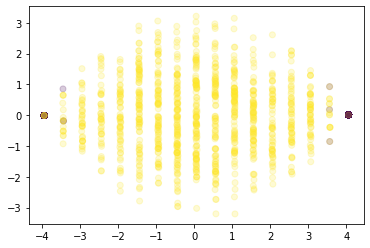

In [147]:
plt.scatter(components[:,0], components[:,1], c=filterned_confs["T"], alpha=0.2)

In [126]:
df_conf + 1.0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0
4998,0.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
